In [89]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [90]:
data = pd.read_csv("zoo.data")
feature_column = ["animal name", "Perimeter", "Major Axis Length", "Minor Axis Length", "Eccentricity", "Convex Area", "Extent"]
data.columns = [*feature_column, "class"]
data

,Area,Perimeter,Major Axis Length,Minor Axis Length,Eccentricity,Convex Area,Extent,class
0,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
1,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
2,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
3,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo
4,13479,477.015991,200.053055,86.650291,0.901328,13786,0.657897,Cammeo
...,...,...,...,...,...,...,...,...
3804,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012,Osmancik
3805,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279,Osmancik
3806,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739,Osmancik
3807,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064,Osmancik


In [91]:
data.describe()

,Area,Perimeter,Major Axis Length,Minor Axis Length,Eccentricity,Convex Area,Extent
count,3809.000000,3809.000000,3809.000000,3809.000000,3809.000000,3809.000000,3809.000000
mean,12667.054608,454.220451,188.765465,86.314071,0.886859,12951.797322,0.661957
std,1732.097026,35.582975,17.438330,5.730536,0.020809,1776.680605,0.077235
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11370.000000,426.138000,174.352432,82.730743,0.872390,11626.000000,0.598890
50%,12421.000000,448.847992,185.801941,86.436562,0.889033,12706.000000,0.645364
75%,13950.000000,483.667999,203.523453,90.146225,0.902568,14284.000000,0.726608
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


In [92]:
feature_data = data[feature_column]
feature_data

,Area,Perimeter,Major Axis Length,Minor Axis Length,Eccentricity,Convex Area,Extent
0,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436
1,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259
2,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669
3,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024
4,13479,477.015991,200.053055,86.650291,0.901328,13786,0.657897
...,...,...,...,...,...,...,...
3804,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012
3805,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279
3806,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739
3807,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064


In [93]:
cov_matrix = feature_data.cov()
cov_matrix

,Area,Perimeter,Major Axis Length,Minor Axis Length,Eccentricity,Convex Area,Extent
Area,3.000160e+06,59566.104448,27275.481879,7823.094781,12.672938,3.074117e+06,-8.129020
Perimeter,5.956610e+04,1266.148123,603.049563,128.519314,0.402893,6.131954e+04,-0.358395
Major Axis Length,2.727548e+04,603.049563,304.095346,45.224146,0.257842,2.798873e+04,-0.187181
Minor Axis Length,7.823095e+03,128.519314,45.224146,32.839037,-0.034788,8.019212e+03,0.028023
Eccentricity,1.267294e+01,0.402893,0.257842,-0.034788,0.000433,1.302182e+01,-0.000318
Convex Area,3.074117e+06,61319.539442,27988.729629,8019.212340,13.021823,3.156594e+06,-8.974779
Extent,-8.129020e+00,-0.358395,-0.187181,0.028023,-0.000318,-8.974779e+00,0.005965


<Axes: >

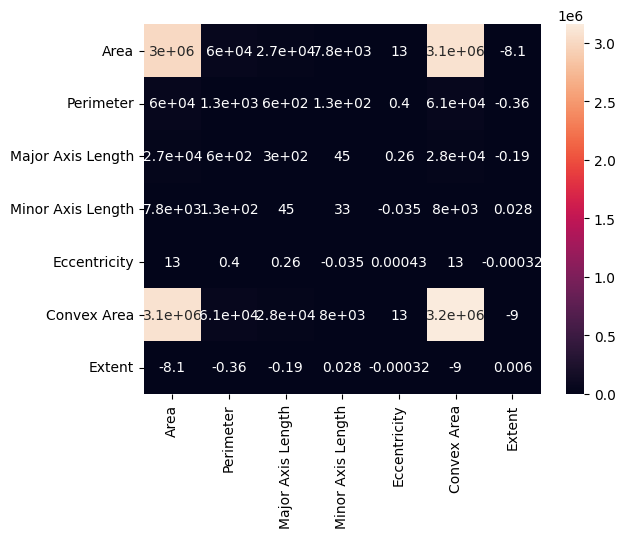

In [94]:
sns.heatmap(cov_matrix, annot=True)

In [95]:
corr_matrix = feature_data.corr()
corr_matrix

,Area,Perimeter,Major Axis Length,Minor Axis Length,Eccentricity,Convex Area,Extent
Area,1.000000,0.966462,0.903016,0.788154,0.351600,0.998939,-0.060764
Perimeter,0.966462,1.000000,0.971865,0.630276,0.544116,0.969945,-0.130408
Major Axis Length,0.903016,0.971865,1.000000,0.452554,0.710547,0.903377,-0.138976
Minor Axis Length,0.788154,0.630276,0.452554,1.000000,-0.291728,0.787639,0.063313
Eccentricity,0.351600,0.544116,0.710547,-0.291728,1.000000,0.352214,-0.198110
Convex Area,0.998939,0.969945,0.903377,0.787639,0.352214,1.000000,-0.065403
Extent,-0.060764,-0.130408,-0.138976,0.063313,-0.198110,-0.065403,1.000000


<Axes: >

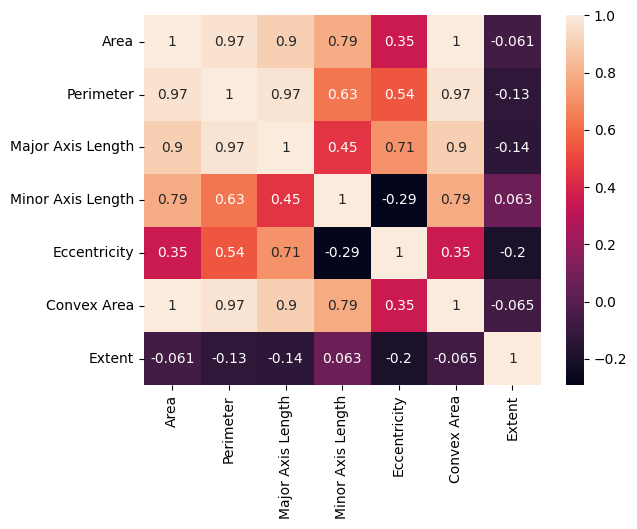

In [96]:
sns.heatmap(corr_matrix, annot=True)

In [139]:
class PCA:
  def __init__(self, data: pd.DataFrame) -> None:
    self.__data = data
    self.__eigval: np.ndarray = None
    self.__eigvec: np.ndarray = None
    self.__x_adj: pd.DataFrame = None
    self.__cov_adj: pd.DataFrame = None
    self.__sort_idx: np.ndarray = None  
    self.__cal_pca()

  def __cal_pca(self):
    self.__x_adj = (self.__data - self.__data.mean()) / self.__data.std()
    self.__cov_adj = self.__x_adj.cov()
    self.__eigval, self.__eigvec = np.linalg.eig(self.__cov_adj)
    self.__sort_idx = np.argsort(self.__eigval)[::-1]

  def eigvec(self, n: int = None) -> np.ndarray:
    if n == None:
      return self.__eigvec
    
    return self.__eigvec[self.__sort_idx[:n]]
  
  def eigval(self, n: int = None) -> np.ndarray:
    if n == None:
      return self.__eigval

    return self.__eigval[self.__sort_idx[:n]]
  
  def project(self, n: int) -> pd.DataFrame:
    max_eigvec = self.eigvec(n)
    new_x = max_eigvec.dot(self.__x_adj.T).T
    new_x = pd.DataFrame(new_x)
    new_x.columns = [f"PC{i+1}" for i in range(n)]
    return new_x
  
  def per_var_of(self, n: int) -> float:
    return self.eigval(n).sum() / self.eigval().sum()
  
  def eig_var(self) -> list[float]:
    sum_val = self.__eigval.sum()
    return [ e / sum_val for e in self.__eigval]



In [98]:
def add_class(data: pd.DataFrame, classes: pd.Series) -> pd.DataFrame:
  with_class = data.copy()
  with_class["class"] = classes
  return with_class

In [110]:
def plot_pca(data: pd.DataFrame, axises: list[str], labels=list, pointsize: int = 0.5, viewbox: list = None) -> None:
  p = None
  if len(axises) == 3:
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes(projection ="3d")
    if viewbox:
      ax.view_init(elev=viewbox[0], azim=viewbox[1], roll=viewbox[2])
    p = ax.scatter3D(*[data[axis] for axis in axises], s=pointsize, c=labels, cmap="viridis")
  else:
    p = plt.scatter(*[data[axis] for axis in axises], s=pointsize, c=labels, cmap="viridis")
  plt.colorbar(p)
  plt.show()

In [140]:
pca = PCA(feature_data)

In [141]:
pca.per_var_of(2)

0.8683425164116756

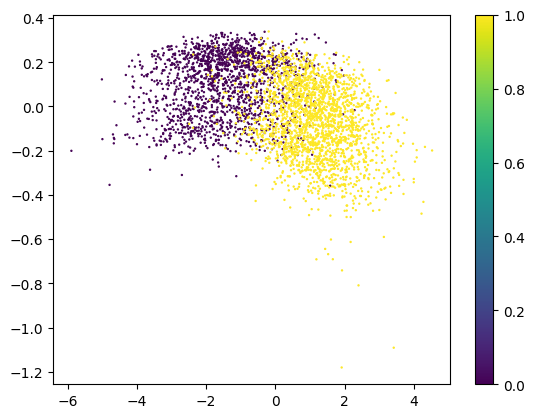

In [142]:
plot_pca(pca.project(2), ["PC1","PC2"], [0 if c == "Cammeo"  else 1 for c in data["class"]])

In [143]:
pca.per_var_of(3)

0.9970818515277663

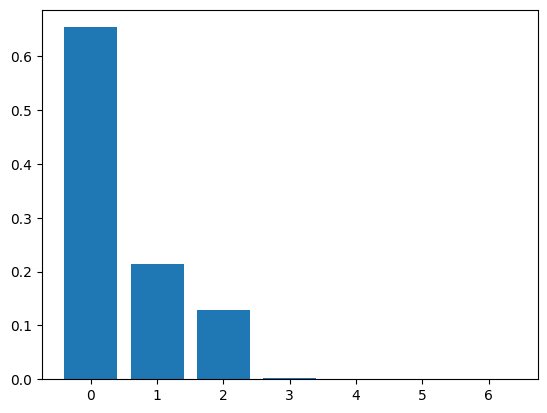

In [145]:
vars = pca.eig_var()
plt.bar(range(len(vars)), vars)
plt.show()

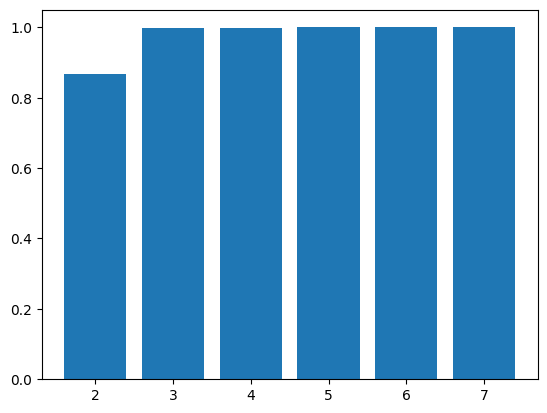

In [147]:
vars = []
for i in range(2, 7+1):
  vars.append(pca.per_var_of(i))
plt.bar(range(2, 7+1), vars)
plt.show()

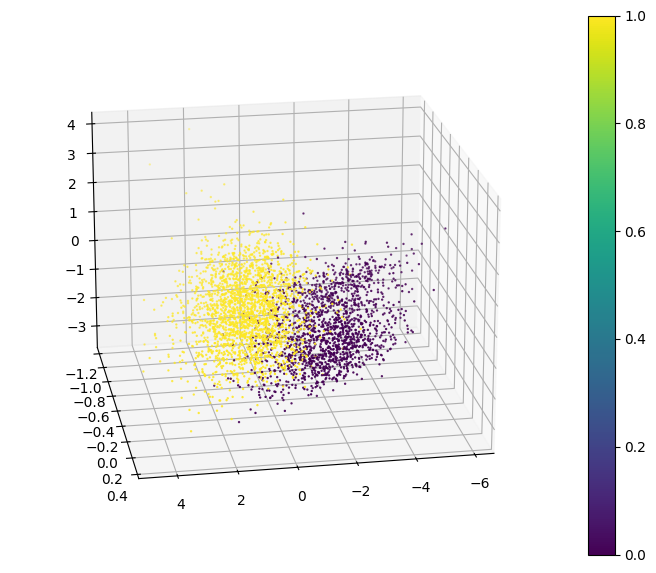

In [153]:
plot_pca(pca.project(3), ["PC1", "PC2", "PC3"], [0 if c == "Cammeo"  else 1 for c in data["class"]], viewbox=[20, 80, 0])